In [274]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree #visualization of the decision tree

#change max columns
pd.set_option('display.max_columns',100)

In [276]:
import streamlit as st
import pandas as pd # Make sure pandas is imported

uploaded_file = st.file_uploader("Upload your CAD CSV file", type=['csv'])

if uploaded_file is not None:
    # Read the file directly from the uploader object
    df = pd.read_csv(uploaded_file)
    st.write("File loaded successfully!")
    st.write(df.head())
else:
    st.write("Please upload a CSV file.")

2025-09-25 17:17:51.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-25 17:17:51.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [277]:
!pip install streamlit

In [278]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/CAD.csv')

In [279]:
df.shape

(303, 55)

In [280]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [281]:
#checking for cardinality of columns
df.nunique()

,0
Age,46
Weight,54
Length,44
Sex,2
BMI,262
DM,2
HTN,2
Current Smoker,2
EX-Smoker,2
FH,2


In [282]:
df['Cath'].unique()#classification problem

array(['Cad', 'Normal'], dtype=object)

In [283]:
#determning how balanced the classes are
df['Cath'].value_counts()

,count
Cath,
Cad,216
Normal,87


In [284]:
df.columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [285]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [286]:
#drop some columns with high correlation
df.drop('Weight', axis=1, inplace=True)
df.drop('Length', axis=1, inplace=True)


In [287]:
df.columns

Index(['Age', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH',
       'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF',
       'DLP', 'BP', 'PR', 'Edema', 'Weak Peripheral Pulse', 'Lung rales',
       'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea',
       'Function Class', 'Atypical', 'Nonanginal', 'Exertional CP',
       'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion',
       'LVH', 'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [288]:
#defining features matrix and target vector
X = df.drop('Cath', axis=1) #X is the variable holding the features
y = df['Cath'] #y is the target

In [289]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [290]:
#establishing the length of the training and test sets
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227
227
76
76


In [291]:
X_train.head(3)

,Age,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD
287,56,Fmale,26.142688,0,0,0,0,0,Y,N,N,N,N,N,Y,110,70,0,N,N,N,N,0,N,0,Y,N,N,N,0,0,0,1,N,N,151,1.4,124,80,45.0,41,19,13.9,4.5,138,5700,37,55,240,45,0,Moderate
282,55,Male,30.739417,0,0,0,0,0,Y,N,N,N,N,N,N,120,80,0,N,N,N,N,1,N,2,N,N,N,N,0,0,0,0,N,N,125,1.2,158,95,34.0,14,5,13.6,4.0,139,5200,18,72,131,50,0,mild
197,85,Male,26.813590,0,1,0,0,1,Y,N,N,N,N,N,N,150,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,0,0,N,N,89,1.6,100,80,39.0,23,23,11.0,4.1,132,10300,10,84,256,45,2,mild


In [292]:
y_train.head(3)

,Cath
287,Normal
282,Cad
197,Cad


In [293]:
#one hot encoding,numerical scaling and ordinal encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [294]:
#list of numercial cols
num_cols= X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Age', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'BP',
       'PR', 'Edema', 'Typical Chest Pain', 'Function Class', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'FBS', 'CR', 'TG', 'LDL',
       'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT',
       'EF-TTE', 'Region RWMA'],
      dtype='object')

In [295]:
#list of categorical cols
cat_cols= X_train.select_dtypes(include=['object','bool']).columns
cat_cols

Index(['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease',
       'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal',
       'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD'],
      dtype='object')

In [296]:
#list of ordinal cols
ord_cols=['Region RWMA','Function Class']
ord_cols

['Region RWMA', 'Function Class']

In [297]:
#list of nominal cols
nominal_cols=['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease','CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal','Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD']
nominal_cols

['Sex',
 'Obesity',
 'CRF',
 'CVA',
 'Airway disease',
 'Thyroid Disease',
 'CHF',
 'DLP',
 'Weak Peripheral Pulse',
 'Lung rales',
 'Systolic Murmur',
 'Diastolic Murmur',
 'Dyspnea',
 'Atypical',
 'Nonanginal',
 'Exertional CP',
 'LowTH Ang',
 'LVH',
 'Poor R Progression',
 'VHD']

In [298]:
print(df['Region RWMA'].unique())
print(df['Function Class'].unique())

[0 4 2 3 1]
[0 3 2 1]


In [299]:
#defining the order for each ordinal column
Region_RWMA_order=[0, 1, 2, 3, 4]
Function_Class_order=[0, 1, 2, 3]

In [300]:
#list of order lists
cat_ord_list=[Region_RWMA_order,Function_Class_order]
cat_ord_list

[[0, 1, 2, 3, 4], [0, 1, 2, 3]]

In [301]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

In [302]:
#creating a numeric transformer
numerical_transformer= make_pipeline(StandardScaler())

In [303]:
#creating a nominal transformer
nominal_transformer= make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

In [304]:
#creating an ordinal transformer
ordinal_transformer= make_pipeline(OrdinalEncoder(categories=cat_ord_list))

In [305]:
#creating a pipeline
preprocessor= make_column_transformer(
    (numerical_transformer, num_cols),
    (nominal_transformer, nominal_cols),
    (ordinal_transformer, ord_cols)
)

In [306]:
#applying pipline to data
X_train_processed= preprocessor.fit_transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [307]:
#randomforestclassifer
from sklearn.ensemble import RandomForestClassifier

In [308]:
#instantitate random forest
model_RF= RandomForestClassifier(n_estimators=100, random_state=42)

In [309]:
#train model
model_RF.fit(X_train_processed,y_train)

RandomForestClassifier(random_state=42)

In [310]:
#get features importnace from trained model
feautures_importance= model_RF.feature_importances_

In [311]:
#sorting important features by descending order

# Get the feature names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

importances_df= pd.DataFrame({'feature': processed_feature_names, 'importance': feautures_importance})
importances_df= importances_df.sort_values('importance', ascending=False)

In [312]:
# Print the top 20 most important features
print("Top 20 most important features:")
print(importances_df.head(20))

Top 20 most important features:
                           feature  importance
0                  pipeline-1__Age    0.082615
10  pipeline-1__Typical Chest Pain    0.081270
22                 pipeline-1__ESR    0.049941
58          pipeline-2__Atypical_N    0.046125
16                 pipeline-1__FBS    0.043901
18                  pipeline-1__TG    0.038389
59          pipeline-2__Atypical_Y    0.036205
29                 pipeline-1__PLT    0.033159
30              pipeline-1__EF-TTE    0.032169
1                  pipeline-1__BMI    0.030748
23                  pipeline-1__HB    0.030146
28                pipeline-1__Neut    0.028779
73         pipeline-3__Region RWMA    0.027679
27               pipeline-1__Lymph    0.026512
24                   pipeline-1__K    0.026500
7                   pipeline-1__BP    0.024990
31         pipeline-1__Region RWMA    0.024800
19                 pipeline-1__LDL    0.024264
20                 pipeline-1__HDL    0.022628
21                 pipeline-

In [313]:
#design model
from sklearn.tree import DecisionTreeClassifier

In [314]:
# instantiate a decision tree
dec_tree= DecisionTreeClassifier(random_state=42)

In [315]:
dec_tree.fit(X_train_processed,y_train)

DecisionTreeClassifier(random_state=42)

In [316]:
#Testing the model to obtain predictions.
dec_pred= dec_tree.predict(X_test_processed)

In [317]:
#predicted values
dec_pred

array(['Normal', 'Cad', 'Cad', 'Cad', 'Normal', 'Normal', 'Cad', 'Cad',
       'Normal', 'Normal', 'Cad', 'Cad', 'Cad', 'Cad', 'Cad', 'Normal',
       'Cad', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Cad',
       'Normal', 'Cad', 'Normal', 'Normal', 'Cad', 'Cad', 'Cad', 'Cad',
       'Normal', 'Cad', 'Normal', 'Cad', 'Normal', 'Normal', 'Cad', 'Cad',
       'Cad', 'Cad', 'Cad', 'Normal', 'Cad', 'Cad', 'Cad', 'Cad', 'Cad',
       'Normal', 'Cad', 'Cad', 'Normal', 'Normal', 'Cad', 'Cad', 'Cad',
       'Cad', 'Cad', 'Normal', 'Cad', 'Cad', 'Cad', 'Cad', 'Normal',
       'Cad', 'Normal', 'Cad', 'Cad', 'Normal', 'Cad', 'Cad', 'Cad',
       'Normal', 'Cad', 'Cad', 'Cad'], dtype=object)

In [318]:
y_train.value_counts()

,count
Cath,
Cad,161
Normal,66


In [319]:
#class_names
target_names=['No CAD','CAD']

In [320]:
#features names
feature_names= preprocessor.get_feature_names_out()

,count
Cath,
Cad,161
Normal,66


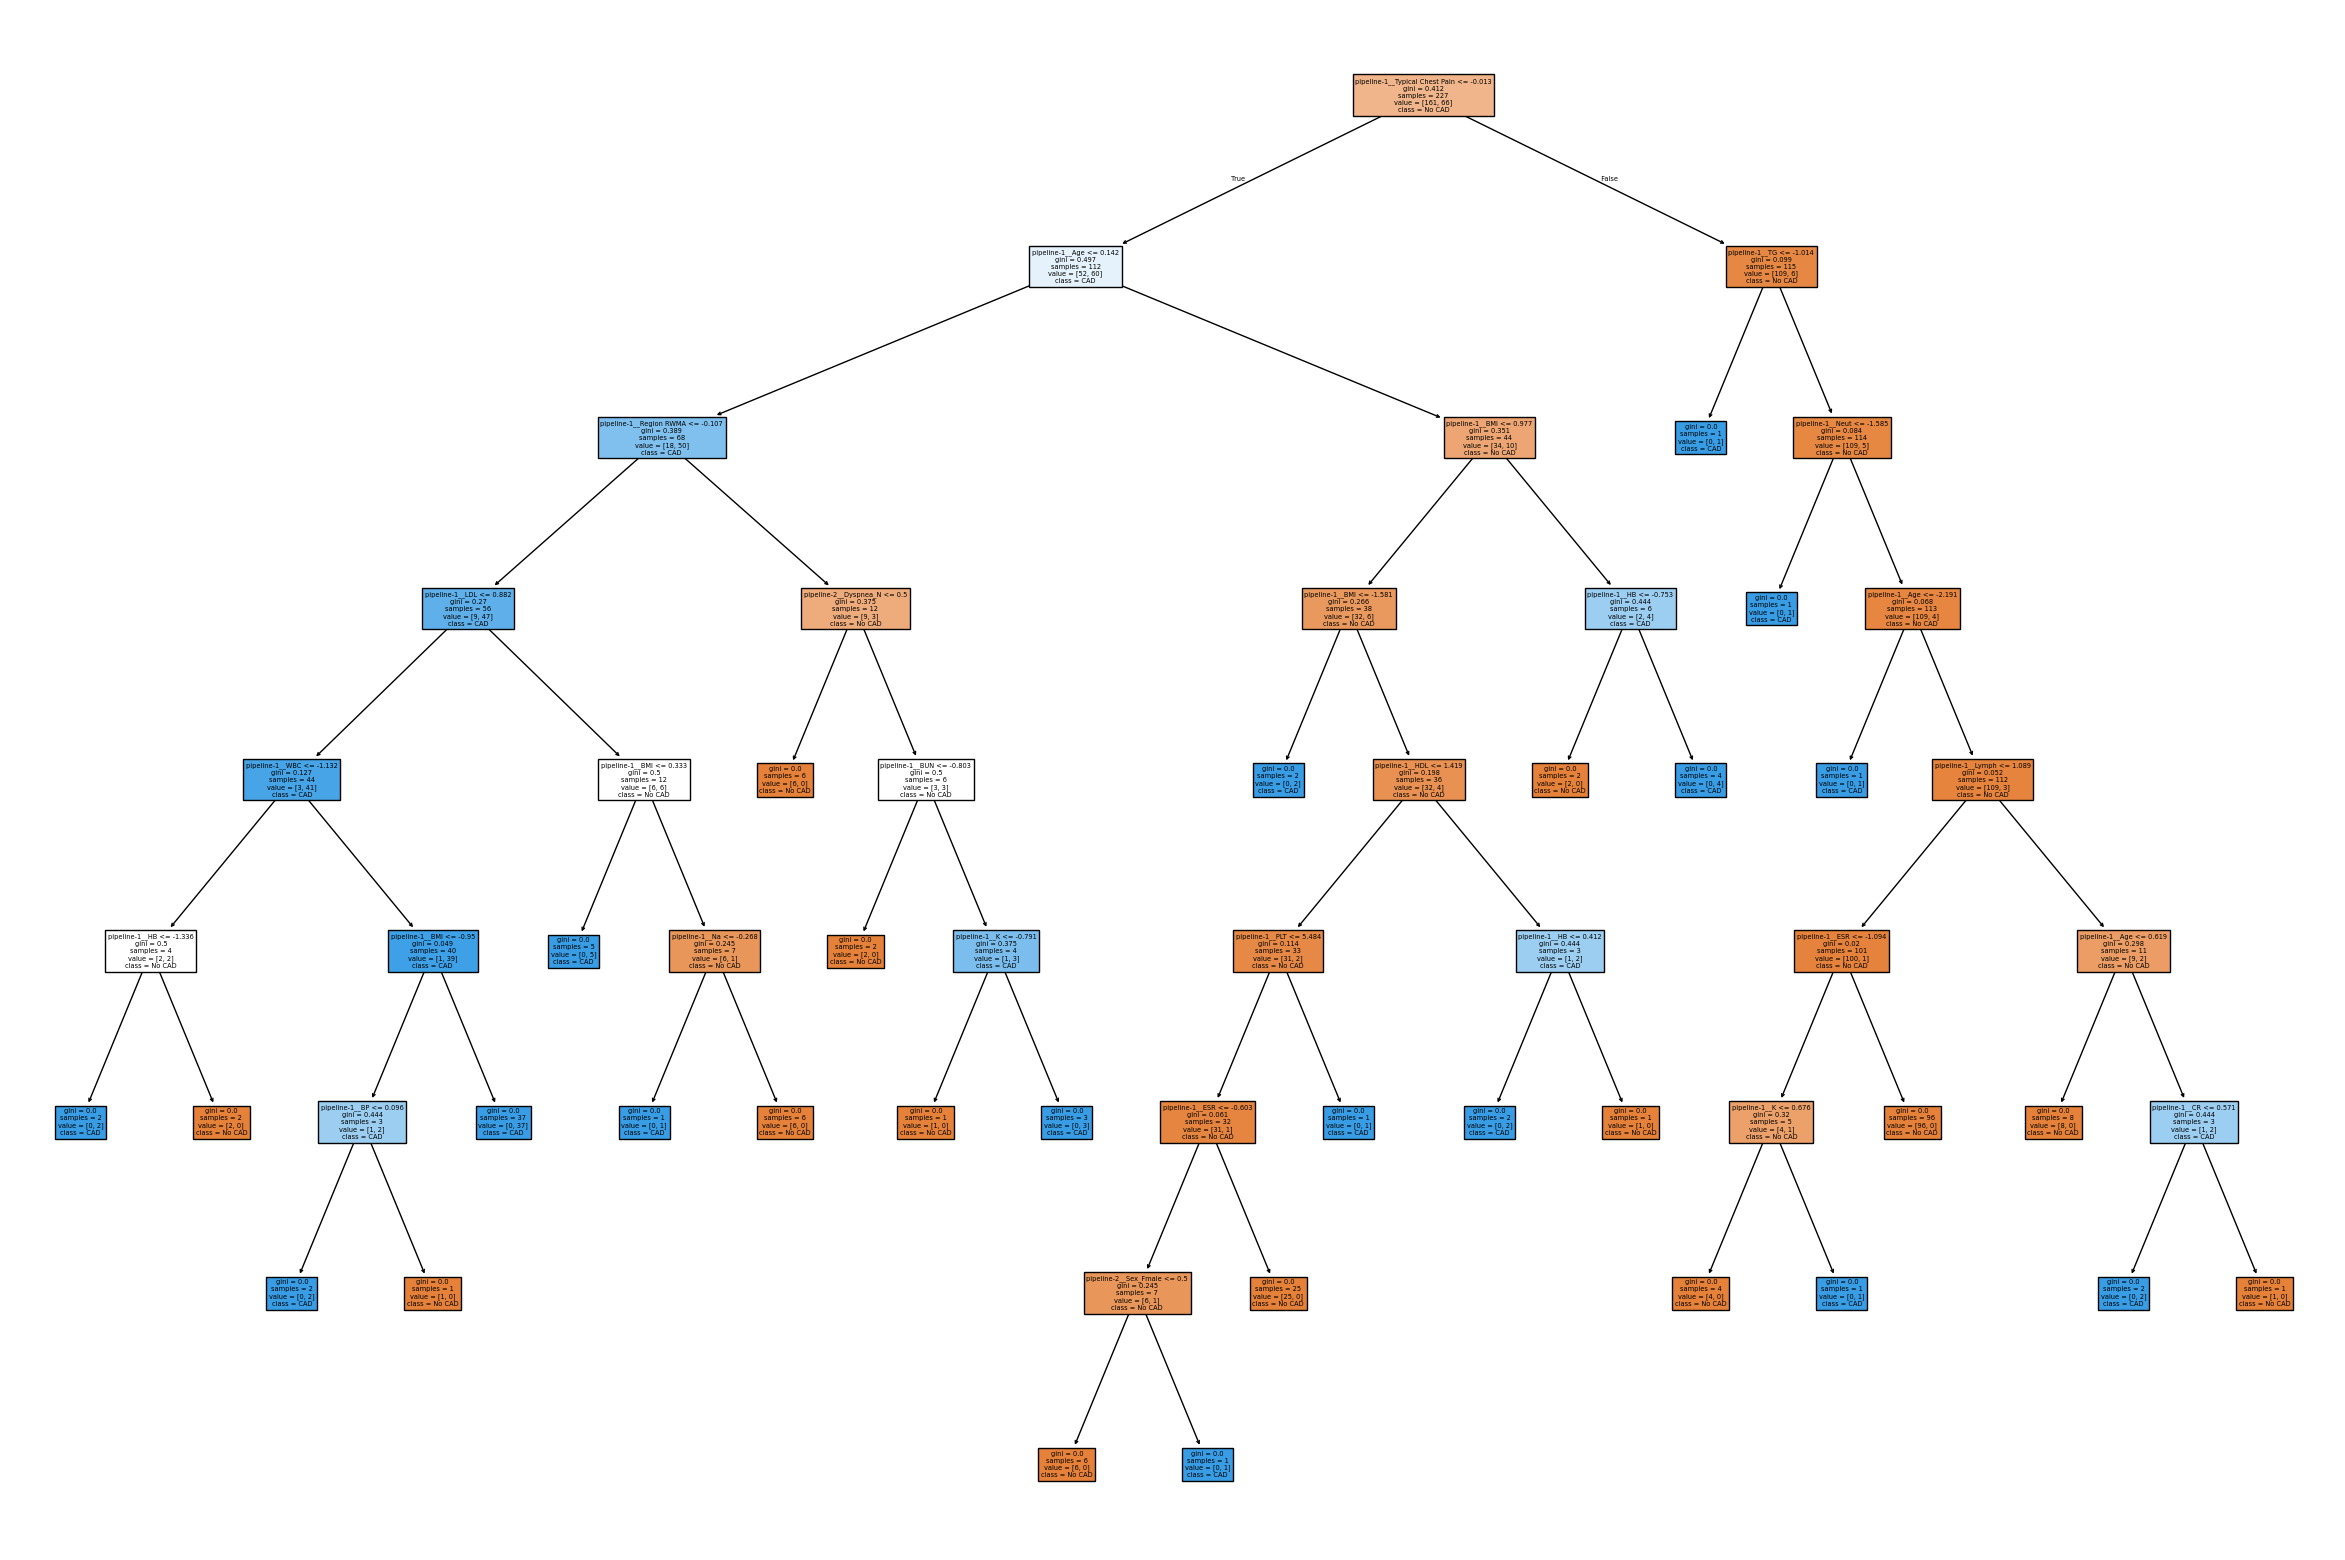

In [321]:
#decision tree visualisation
plt.figure(figsize=(30,20))
tree.plot_tree(dec_tree,filled=True, feature_names=preprocessor.get_feature_names_out(),class_names=target_names)

#first split with a feature with high information gain
y_train.value_counts()

In [322]:
#evaluation metrics library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [323]:
precision_score(y_test, dec_pred, average='weighted')

0.7885785893304691

In [324]:
precision_score(y_test, dec_pred, average='macro')

0.7165532879818595

In [325]:
#evaluating model
classification_report(y_test, dec_pred)

'              precision    recall  f1-score   support\n\n         Cad       0.88      0.78      0.83        55\n      Normal       0.56      0.71      0.62        21\n\n    accuracy                           0.76        76\n   macro avg       0.72      0.75      0.73        76\nweighted avg       0.79      0.76      0.77        76\n'

In [326]:
accuracy_score(y_test, dec_pred)

0.7631578947368421

In [327]:
confusion_matrix(y_test, dec_pred)

array([[43, 12],
       [ 6, 15]])

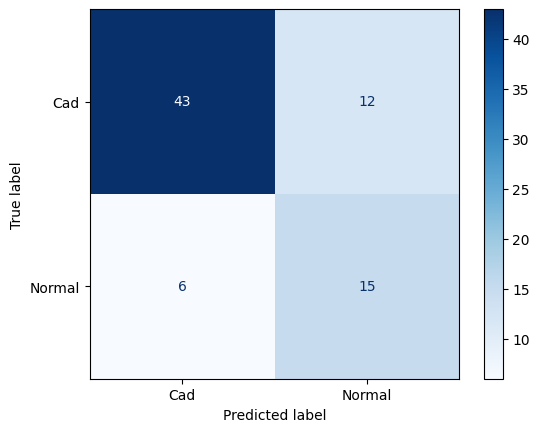

In [328]:
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred, cmap='Blues')

KNN CLASSIFIER

In [329]:
#importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [330]:
#instantiate object
knn= KNeighborsClassifier(n_neighbors=21)

In [331]:
#train the model
knn.fit(X_train_processed,y_train)

KNeighborsClassifier(n_neighbors=21)

In [332]:
#test the model
knn_pred= knn.predict(X_test_processed)

In [333]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         Cad       0.85      0.95      0.90        55
      Normal       0.80      0.57      0.67        21

    accuracy                           0.84        76
   macro avg       0.83      0.76      0.78        76
weighted avg       0.84      0.84      0.83        76



In [334]:
accuracy_score(y_test, knn_pred)

0.8421052631578947

In [335]:
confusion_matrix(y_test, knn_pred)

array([[52,  3],
       [ 9, 12]])

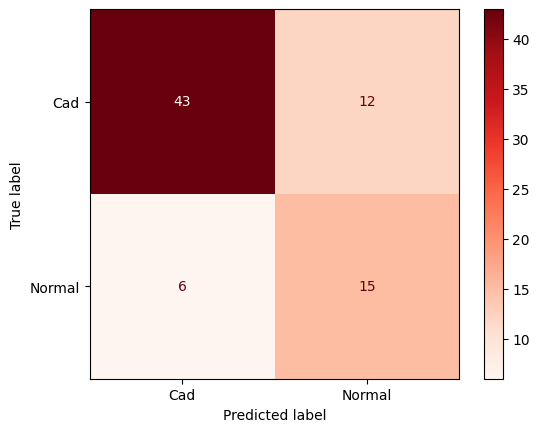

In [336]:
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred, cmap='Reds')

DEPLOYING MODEL

In [337]:
#importing necessary libraries
import pickle

In [338]:
# saving the model
filename= 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb')) #wb-writing in binary

In [339]:
#downlaoding model
from google.colab import files
files.download('knn_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [340]:
loaded_knn_model = pickle.load(open(filename, 'rb')) #rb-reading in binary

In [341]:
# Save the preprocessor
preprocessor_filename = 'preprocessor.sav'
pickle.dump(preprocessor, open(preprocessor_filename, 'wb'))

In [342]:
#downloading preprocessor
from google.colab import files
files.download('preprocessor.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>